# Assignment: Compresive Strength Concrete Problem


### Abstract: 

Concrete is the most important material in civil engineering. The concrete compressive strength (concrete strength to bear the load) is a highly nonlinear function of age and ingredients.  <br><br>

<table border="1"  cellpadding="6" bordercolor="red">
	<tbody>
        <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Data Set Characteristics:&nbsp;&nbsp;</b></p></td>
		<td><p class="normal">Multivariate</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Instances:</b></p></td>
		<td><p class="normal">1030</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Area:</b></p></td>
		<td><p class="normal">Physical</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">
    <tbody>
        <tr>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Attribute Characteristics:</b></p></td>
            <td><p class="normal">Real</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Number of Attributes:</b></p></td>
            <td><p class="normal">9</p></td>
            <td bgcolor="#DDEEFF"><p class="normal"><b>Date Donated</b></p></td>
            <td><p class="normal">2007-08-03</p></td>
        </tr>
     </tbody>
    </table>
<table border="1" cellpadding="6">	
    <tbody>
    <tr>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Associated Tasks:</b></p></td>
		<td><p class="normal">Regression</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Missing Values?</b></p></td>
		<td><p class="normal">N/A</p></td>
		<td bgcolor="#DDEEFF"><p class="normal"><b>Number of Web Hits:</b></p></td>
		<td><p class="normal">231464</p></td>
	</tr>
    </tbody>
    </table>

###  Description:
| Features Name | Data Type | Measurement | Description |
| -- | -- | -- | -- |
Cement (component 1) | quantitative | kg in a m3 mixture | Input Variable
Blast Furnace Slag (component 2) | quantitative | kg in a m3 mixture | Input Variable
Fly Ash (component 3) | quantitative | kg in a m3 mixture | Input Variable
Water (component 4) | quantitative | kg in a m3 mixture | Input Variable
Superplasticizer (component 5) | quantitative | kg in a m3 mixture | Input Variable
Coarse Aggregate (component 6) | quantitative | kg in a m3 mixture | Input Variable
Fine Aggregate (component 7) | quantitative | kg in a m3 mixture | Input Variable
Age | quantitative | Day (1~365) | Input Variable
Concrete compressive strength | quantitative | MPa | Output Variable

### WORKFLOW :
- Load Data
- Check Missing Values ( If Exist ; Fill each record with mean of its feature )
- Standardized the Input Variables. **Hint**: Centeralized the data
- Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).
- Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).
- Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
- Train the Model with Epochs (100) and validate it
- If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .
- Evaluation Step
- Prediction


# Load Data:
[Click Here to Download DataSet](https://github.com/ramsha275/ML_Datasets/blob/main/compresive_strength_concrete.csv)

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD

In [2]:
data= pd.read_csv('compresive_strength_concrete.csv')

In [3]:
data

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [4]:
data.isnull().values.any()

False

In [5]:
x = (data.loc[:, data.columns != 'Concrete compressive strength(MPa, megapascals) '])
y = (data.loc[:, data.columns == 'Concrete compressive strength(MPa, megapascals) '])

### Standardized the Input Variables

In [6]:
# data standardization with  sklearn
from sklearn.preprocessing import StandardScaler

x=x.copy()

num_cols = ['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)']
for i in num_cols:
    
    scale = StandardScaler().fit(x[[i]])
    
    x[i] = scale.transform(x[[i]])

In [7]:
x

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
0,2.477915,-0.856888,-0.847144,-0.916764,-0.620448,0.863154,-1.217670,-0.279733
1,2.477915,-0.856888,-0.847144,-0.916764,-0.620448,1.056164,-1.217670,-0.279733
2,0.491425,0.795526,-0.847144,2.175461,-1.039143,-0.526517,-2.240917,3.553066
3,0.491425,0.795526,-0.847144,2.175461,-1.039143,-0.526517,-2.240917,5.057677
4,-0.790459,0.678408,-0.847144,0.488793,-1.039143,0.070527,0.647884,4.978487
...,...,...,...,...,...,...,...,...
1025,-0.045645,0.488235,0.564545,-0.092171,0.451410,-1.323005,-0.065893,-0.279733
1026,0.392819,-0.856888,0.960068,0.676200,0.702626,-1.994680,0.496893,-0.279733
1027,-1.270088,0.759579,0.850635,0.521589,-0.017528,-1.036064,0.080107,-0.279733
1028,-1.168610,1.308065,-0.847144,-0.279579,0.853356,0.214641,0.191166,-0.279733


### Split Data

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)

### Model

In [9]:
x_train.shape

(721, 8)

##from keras import models
from keras import layers
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(16, activation='relu',input_shape=(8,)))
    model.add(layers.Dense(8, activation='relu'))
    model.add(layers.Dense(6, activation='relu'))

    model.add(layers.Dense(1, activation='tanh'))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

    return model

In [120]:
from keras import models
from keras import layers
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(16, activation='relu',input_shape=(8,)))
    model.add(layers.Dense(4, activation='relu'))

    model.add(layers.Dense(1, activation='linear'))
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])

    return model
    

In [121]:
k = 4
num_val_samples = len(x_train) // k
num_epochs = 220
all_val_mae = []
all_mae = []


for i in range(k):
    print('processing fold #', i)
    val_data = x_train[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = y_train[i * num_val_samples: (i + 1) * num_val_samples]
    partialx_train = np.concatenate(
    [x_train[:i * num_val_samples],
    x_train[(i + 1) * num_val_samples:]],
    axis=0)
    partialy_train = np.concatenate([y_train[:i * num_val_samples],y_train[(i + 1) * num_val_samples:]],
    axis=0)
    model = build_model()
    history = model.fit(partialx_train, partialy_train,validation_data=(val_data, val_targets),
    epochs=num_epochs, batch_size=16, verbose=1)
    val_mae_history = history.history['val_mae']
    mae_history= history.history['mae']
    all_mae.append(mae_history)
    all_val_mae.append(val_mae_history)

    

processing fold # 0
Epoch 1/220
34/34 [==============================] - 0s 13ms/step - loss: 1577.6923 - mae: 35.9318 - val_loss: 1606.6283 - val_mae: 36.2478
Epoch 2/220
34/34 [==============================] - 0s 4ms/step - loss: 1566.3328 - mae: 35.7692 - val_loss: 1597.6021 - val_mae: 36.1208
Epoch 3/220
34/34 [==============================] - 0s 4ms/step - loss: 1558.9620 - mae: 35.6538 - val_loss: 1589.4012 - val_mae: 35.9958
Epoch 4/220
34/34 [==============================] - 0s 4ms/step - loss: 1548.2736 - mae: 35.4899 - val_loss: 1573.8323 - val_mae: 35.7684
Epoch 5/220
34/34 [==============================] - 0s 4ms/step - loss: 1525.7948 - mae: 35.1787 - val_loss: 1545.6722 - val_mae: 35.3864
Epoch 6/220
34/34 [==============================] - 0s 5ms/step - loss: 1487.5392 - mae: 34.6863 - val_loss: 1499.7841 - val_mae: 34.7951
Epoch 7/220
34/34 [==============================] - 0s 7ms/step - loss: 1437.0194 - mae: 34.0317 - val_loss: 1445.0159 - val_mae: 34.0794
Epoch 

34/34 [==============================] - 0s 4ms/step - loss: 124.2911 - mae: 9.0917 - val_loss: 140.1062 - val_mae: 9.6390
Epoch 61/220
34/34 [==============================] - 0s 3ms/step - loss: 122.9114 - mae: 9.0377 - val_loss: 138.5240 - val_mae: 9.5772
Epoch 62/220
34/34 [==============================] - 0s 3ms/step - loss: 121.7000 - mae: 8.9906 - val_loss: 137.0662 - val_mae: 9.5074
Epoch 63/220
34/34 [==============================] - 0s 3ms/step - loss: 120.7558 - mae: 8.9456 - val_loss: 135.8600 - val_mae: 9.4559
Epoch 64/220
34/34 [==============================] - 0s 3ms/step - loss: 119.2217 - mae: 8.8942 - val_loss: 134.2929 - val_mae: 9.4040
Epoch 65/220
34/34 [==============================] - 0s 5ms/step - loss: 118.1017 - mae: 8.8484 - val_loss: 132.8866 - val_mae: 9.3276
Epoch 66/220
34/34 [==============================] - 0s 3ms/step - loss: 117.1734 - mae: 8.8155 - val_loss: 131.5273 - val_mae: 9.2792
Epoch 67/220
34/34 [==============================] - 0s 3ms/

Epoch 121/220
34/34 [==============================] - 0s 3ms/step - loss: 65.3104 - mae: 6.2445 - val_loss: 75.7430 - val_mae: 6.8548
Epoch 122/220
34/34 [==============================] - 0s 3ms/step - loss: 64.3600 - mae: 6.2046 - val_loss: 75.2904 - val_mae: 6.8294
Epoch 123/220
34/34 [==============================] - 0s 3ms/step - loss: 63.9028 - mae: 6.1869 - val_loss: 74.2974 - val_mae: 6.7896
Epoch 124/220
34/34 [==============================] - 0s 3ms/step - loss: 63.2223 - mae: 6.1401 - val_loss: 73.8807 - val_mae: 6.7751
Epoch 125/220
34/34 [==============================] - 0s 3ms/step - loss: 62.8679 - mae: 6.1267 - val_loss: 73.4377 - val_mae: 6.7593
Epoch 126/220
34/34 [==============================] - 0s 3ms/step - loss: 62.3905 - mae: 6.1063 - val_loss: 73.3736 - val_mae: 6.7695
Epoch 127/220
34/34 [==============================] - 0s 3ms/step - loss: 61.8536 - mae: 6.0868 - val_loss: 72.8619 - val_mae: 6.7575
Epoch 128/220
34/34 [==============================] - 

Epoch 182/220
34/34 [==============================] - 0s 3ms/step - loss: 47.2817 - mae: 5.2262 - val_loss: 61.0732 - val_mae: 6.1706
Epoch 183/220
34/34 [==============================] - 0s 4ms/step - loss: 47.1346 - mae: 5.2337 - val_loss: 60.5749 - val_mae: 6.1262
Epoch 184/220
34/34 [==============================] - 0s 4ms/step - loss: 47.1953 - mae: 5.2310 - val_loss: 60.5493 - val_mae: 6.1367
Epoch 185/220
34/34 [==============================] - 0s 3ms/step - loss: 46.7177 - mae: 5.2039 - val_loss: 60.7282 - val_mae: 6.1258
Epoch 186/220
34/34 [==============================] - 0s 4ms/step - loss: 46.2989 - mae: 5.1885 - val_loss: 59.8911 - val_mae: 6.0771
Epoch 187/220
34/34 [==============================] - 0s 5ms/step - loss: 46.2087 - mae: 5.1674 - val_loss: 60.1076 - val_mae: 6.0960
Epoch 188/220
34/34 [==============================] - 0s 4ms/step - loss: 46.0879 - mae: 5.1721 - val_loss: 60.0881 - val_mae: 6.1100
Epoch 189/220
34/34 [==============================] - 

Epoch 22/220
34/34 [==============================] - 0s 3ms/step - loss: 205.2434 - mae: 11.3037 - val_loss: 204.1126 - val_mae: 11.4724
Epoch 23/220
34/34 [==============================] - 0s 3ms/step - loss: 195.5715 - mae: 11.0325 - val_loss: 197.5567 - val_mae: 11.2968
Epoch 24/220
34/34 [==============================] - 0s 3ms/step - loss: 188.3792 - mae: 10.8368 - val_loss: 192.4724 - val_mae: 11.1585
Epoch 25/220
34/34 [==============================] - 0s 3ms/step - loss: 183.1509 - mae: 10.6987 - val_loss: 188.7699 - val_mae: 11.0556
Epoch 26/220
34/34 [==============================] - 0s 3ms/step - loss: 178.6840 - mae: 10.5801 - val_loss: 185.1408 - val_mae: 10.9583
Epoch 27/220
34/34 [==============================] - 0s 3ms/step - loss: 175.1257 - mae: 10.5009 - val_loss: 182.1335 - val_mae: 10.8840
Epoch 28/220
34/34 [==============================] - 0s 3ms/step - loss: 171.8888 - mae: 10.4217 - val_loss: 179.0027 - val_mae: 10.8063
Epoch 29/220
34/34 [==============

34/34 [==============================] - 0s 3ms/step - loss: 81.7990 - mae: 7.1088 - val_loss: 89.6240 - val_mae: 7.5426
Epoch 83/220
34/34 [==============================] - 0s 3ms/step - loss: 80.1406 - mae: 7.0182 - val_loss: 87.6266 - val_mae: 7.4458
Epoch 84/220
34/34 [==============================] - 0s 3ms/step - loss: 78.7384 - mae: 6.9572 - val_loss: 85.9658 - val_mae: 7.3303
Epoch 85/220
34/34 [==============================] - 0s 3ms/step - loss: 77.0687 - mae: 6.8609 - val_loss: 84.3228 - val_mae: 7.2448
Epoch 86/220
34/34 [==============================] - 0s 3ms/step - loss: 75.7913 - mae: 6.7857 - val_loss: 83.0905 - val_mae: 7.1822
Epoch 87/220
34/34 [==============================] - 0s 3ms/step - loss: 74.2539 - mae: 6.7114 - val_loss: 81.7832 - val_mae: 7.0948
Epoch 88/220
34/34 [==============================] - 0s 3ms/step - loss: 73.1031 - mae: 6.6371 - val_loss: 80.1346 - val_mae: 7.0102
Epoch 89/220
34/34 [==============================] - 0s 3ms/step - loss: 7

Epoch 143/220
34/34 [==============================] - 0s 3ms/step - loss: 40.0286 - mae: 4.7428 - val_loss: 48.9810 - val_mae: 5.0840
Epoch 144/220
34/34 [==============================] - 0s 3ms/step - loss: 40.0104 - mae: 4.7673 - val_loss: 48.9664 - val_mae: 5.0895
Epoch 145/220
34/34 [==============================] - 0s 3ms/step - loss: 39.6228 - mae: 4.7410 - val_loss: 48.4654 - val_mae: 5.0714
Epoch 146/220
34/34 [==============================] - 0s 3ms/step - loss: 39.2508 - mae: 4.7274 - val_loss: 48.2531 - val_mae: 5.0705
Epoch 147/220
34/34 [==============================] - 0s 3ms/step - loss: 39.2436 - mae: 4.7208 - val_loss: 48.3375 - val_mae: 5.0647
Epoch 148/220
34/34 [==============================] - 0s 3ms/step - loss: 39.0437 - mae: 4.7156 - val_loss: 48.1836 - val_mae: 5.0558
Epoch 149/220
34/34 [==============================] - 0s 3ms/step - loss: 38.8555 - mae: 4.7003 - val_loss: 47.7436 - val_mae: 5.0623
Epoch 150/220
34/34 [==============================] - 

Epoch 204/220
34/34 [==============================] - 0s 3ms/step - loss: 33.2403 - mae: 4.3501 - val_loss: 43.8458 - val_mae: 4.9384
Epoch 205/220
34/34 [==============================] - 0s 3ms/step - loss: 33.1324 - mae: 4.3212 - val_loss: 43.7917 - val_mae: 4.9385
Epoch 206/220
34/34 [==============================] - 0s 3ms/step - loss: 33.1259 - mae: 4.3329 - val_loss: 43.8689 - val_mae: 4.9500
Epoch 207/220
34/34 [==============================] - 0s 3ms/step - loss: 33.1327 - mae: 4.3465 - val_loss: 43.5715 - val_mae: 4.9327
Epoch 208/220
34/34 [==============================] - 0s 3ms/step - loss: 33.0978 - mae: 4.3270 - val_loss: 43.4318 - val_mae: 4.9301
Epoch 209/220
34/34 [==============================] - 0s 3ms/step - loss: 32.9278 - mae: 4.3163 - val_loss: 43.9134 - val_mae: 4.9389
Epoch 210/220
34/34 [==============================] - 0s 3ms/step - loss: 33.0405 - mae: 4.3345 - val_loss: 43.3653 - val_mae: 4.9287
Epoch 211/220
34/34 [==============================] - 

34/34 [==============================] - 0s 3ms/step - loss: 136.6684 - mae: 9.4185 - val_loss: 140.1495 - val_mae: 9.5339
Epoch 44/220
34/34 [==============================] - 0s 3ms/step - loss: 134.5296 - mae: 9.3453 - val_loss: 138.2326 - val_mae: 9.4751
Epoch 45/220
34/34 [==============================] - 0s 3ms/step - loss: 132.5835 - mae: 9.2751 - val_loss: 136.6801 - val_mae: 9.4118
Epoch 46/220
34/34 [==============================] - 0s 4ms/step - loss: 130.4827 - mae: 9.1976 - val_loss: 134.2238 - val_mae: 9.3188
Epoch 47/220
34/34 [==============================] - 0s 3ms/step - loss: 128.8433 - mae: 9.1269 - val_loss: 132.2333 - val_mae: 9.2339
Epoch 48/220
34/34 [==============================] - 0s 6ms/step - loss: 126.6540 - mae: 9.0544 - val_loss: 131.1383 - val_mae: 9.1852
Epoch 49/220
34/34 [==============================] - 0s 3ms/step - loss: 124.7155 - mae: 8.9853 - val_loss: 128.4309 - val_mae: 9.0840
Epoch 50/220
34/34 [==============================] - 0s 3ms/

Epoch 104/220
34/34 [==============================] - 0s 7ms/step - loss: 59.2315 - mae: 6.0300 - val_loss: 68.2655 - val_mae: 6.3757
Epoch 105/220
34/34 [==============================] - 0s 4ms/step - loss: 58.6161 - mae: 5.9783 - val_loss: 67.9599 - val_mae: 6.3588
Epoch 106/220
34/34 [==============================] - 0s 4ms/step - loss: 58.0889 - mae: 5.9680 - val_loss: 67.2950 - val_mae: 6.3339
Epoch 107/220
34/34 [==============================] - 0s 3ms/step - loss: 57.7033 - mae: 5.9363 - val_loss: 67.1154 - val_mae: 6.3278
Epoch 108/220
34/34 [==============================] - 0s 3ms/step - loss: 57.1748 - mae: 5.9257 - val_loss: 66.8417 - val_mae: 6.2973
Epoch 109/220
34/34 [==============================] - 0s 5ms/step - loss: 56.8273 - mae: 5.8916 - val_loss: 66.8116 - val_mae: 6.2658
Epoch 110/220
34/34 [==============================] - 0s 3ms/step - loss: 56.2599 - mae: 5.8618 - val_loss: 66.5039 - val_mae: 6.2634
Epoch 111/220
34/34 [==============================] - 

34/34 [==============================] - 0s 3ms/step - loss: 43.7086 - mae: 5.0993 - val_loss: 60.6730 - val_mae: 5.8339
Epoch 165/220
34/34 [==============================] - 0s 3ms/step - loss: 43.3485 - mae: 5.0904 - val_loss: 60.9601 - val_mae: 5.8236
Epoch 166/220
34/34 [==============================] - 0s 3ms/step - loss: 43.4150 - mae: 5.0794 - val_loss: 60.6997 - val_mae: 5.8319
Epoch 167/220
34/34 [==============================] - 0s 3ms/step - loss: 43.1268 - mae: 5.0655 - val_loss: 60.7187 - val_mae: 5.8257
Epoch 168/220
34/34 [==============================] - 0s 3ms/step - loss: 43.2629 - mae: 5.0932 - val_loss: 61.3861 - val_mae: 5.8145
Epoch 169/220
34/34 [==============================] - 0s 3ms/step - loss: 43.0267 - mae: 5.0578 - val_loss: 60.6681 - val_mae: 5.8234
Epoch 170/220
34/34 [==============================] - 0s 3ms/step - loss: 42.7172 - mae: 5.0435 - val_loss: 60.8800 - val_mae: 5.8076
Epoch 171/220
34/34 [==============================] - 0s 3ms/step - 

Epoch 3/220
34/34 [==============================] - 0s 3ms/step - loss: 1561.6038 - mae: 35.7306 - val_loss: 1539.8948 - val_mae: 35.4017
Epoch 4/220
34/34 [==============================] - 0s 3ms/step - loss: 1541.2424 - mae: 35.4725 - val_loss: 1511.7023 - val_mae: 35.0329
Epoch 5/220
34/34 [==============================] - 0s 3ms/step - loss: 1509.9152 - mae: 35.0515 - val_loss: 1470.2068 - val_mae: 34.4714
Epoch 6/220
34/34 [==============================] - 0s 3ms/step - loss: 1464.8656 - mae: 34.4438 - val_loss: 1413.7012 - val_mae: 33.7001
Epoch 7/220
34/34 [==============================] - 0s 3ms/step - loss: 1403.7256 - mae: 33.6096 - val_loss: 1345.0807 - val_mae: 32.7331
Epoch 8/220
34/34 [==============================] - 0s 3ms/step - loss: 1329.3727 - mae: 32.5696 - val_loss: 1257.6528 - val_mae: 31.4756
Epoch 9/220
34/34 [==============================] - 0s 3ms/step - loss: 1237.9414 - mae: 31.2582 - val_loss: 1156.5354 - val_mae: 29.9410
Epoch 10/220
34/34 [=======

34/34 [==============================] - 0s 3ms/step - loss: 124.7138 - mae: 8.9967 - val_loss: 133.7624 - val_mae: 9.3255
Epoch 63/220
34/34 [==============================] - 0s 3ms/step - loss: 123.7581 - mae: 8.9708 - val_loss: 132.3743 - val_mae: 9.2914
Epoch 64/220
34/34 [==============================] - 0s 3ms/step - loss: 122.7732 - mae: 8.9327 - val_loss: 131.9435 - val_mae: 9.2705
Epoch 65/220
34/34 [==============================] - 0s 3ms/step - loss: 121.6472 - mae: 8.8961 - val_loss: 131.1615 - val_mae: 9.2425
Epoch 66/220
34/34 [==============================] - 0s 3ms/step - loss: 120.7056 - mae: 8.8551 - val_loss: 130.3425 - val_mae: 9.2073
Epoch 67/220
34/34 [==============================] - 0s 3ms/step - loss: 119.8606 - mae: 8.8251 - val_loss: 129.0645 - val_mae: 9.1732
Epoch 68/220
34/34 [==============================] - 0s 3ms/step - loss: 118.7452 - mae: 8.7714 - val_loss: 128.7238 - val_mae: 9.1536
Epoch 69/220
34/34 [==============================] - 0s 3ms/

34/34 [==============================] - 0s 3ms/step - loss: 74.7995 - mae: 6.7117 - val_loss: 87.8998 - val_mae: 7.2058
Epoch 123/220
34/34 [==============================] - 0s 3ms/step - loss: 74.3317 - mae: 6.6850 - val_loss: 86.8285 - val_mae: 7.1784
Epoch 124/220
34/34 [==============================] - 0s 3ms/step - loss: 73.9641 - mae: 6.6639 - val_loss: 86.6103 - val_mae: 7.1648
Epoch 125/220
34/34 [==============================] - 0s 3ms/step - loss: 73.6521 - mae: 6.6424 - val_loss: 86.0692 - val_mae: 7.1436
Epoch 126/220
34/34 [==============================] - 0s 3ms/step - loss: 72.6432 - mae: 6.5803 - val_loss: 85.3863 - val_mae: 7.1012
Epoch 127/220
34/34 [==============================] - 0s 3ms/step - loss: 72.2070 - mae: 6.5624 - val_loss: 85.0231 - val_mae: 7.0956
Epoch 128/220
34/34 [==============================] - 0s 3ms/step - loss: 71.5408 - mae: 6.5320 - val_loss: 84.7053 - val_mae: 7.0747
Epoch 129/220
34/34 [==============================] - 0s 3ms/step - 

Epoch 183/220
34/34 [==============================] - 0s 3ms/step - loss: 53.1402 - mae: 5.5122 - val_loss: 64.7368 - val_mae: 6.1222
Epoch 184/220
34/34 [==============================] - 0s 3ms/step - loss: 53.0724 - mae: 5.4903 - val_loss: 64.4654 - val_mae: 6.1263
Epoch 185/220
34/34 [==============================] - 0s 3ms/step - loss: 52.7012 - mae: 5.4803 - val_loss: 64.6010 - val_mae: 6.1047
Epoch 186/220
34/34 [==============================] - 0s 3ms/step - loss: 52.5673 - mae: 5.4712 - val_loss: 63.7781 - val_mae: 6.0723
Epoch 187/220
34/34 [==============================] - 0s 3ms/step - loss: 52.3732 - mae: 5.4580 - val_loss: 63.9168 - val_mae: 6.0967
Epoch 188/220
34/34 [==============================] - 0s 3ms/step - loss: 52.3718 - mae: 5.4603 - val_loss: 64.0021 - val_mae: 6.0804
Epoch 189/220
34/34 [==============================] - 0s 3ms/step - loss: 51.8865 - mae: 5.4256 - val_loss: 63.5596 - val_mae: 6.0574
Epoch 190/220
34/34 [==============================] - 

In [100]:
average_mae = [
np.mean([x[i] for x in all_mae]) for i in range(num_epochs)]
average_val_mae = [
np.mean([x[i] for x in all_val_mae]) for i in range(num_epochs)]

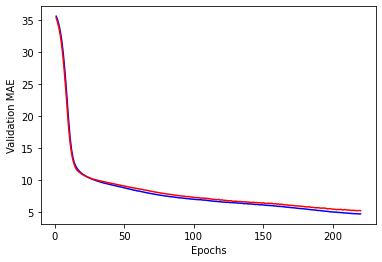

In [117]:
import matplotlib.pyplot as plt
epochs= range(1, len(average_mae) + 1)
plt.plot(epochs, average_mae, 'b',label=' Training')
plt.plot(epochs, average_val_mae, 'r', label= 'Validation')

plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [145]:
test_mse_score, test_mae_score = model.evaluate(x_test, y_test)

10/10 [==============================] - 0s 2ms/step - loss: 49.3121 - mae: 5.3023


In [146]:
test_mae_score

5.302292823791504

In [15]:
y_pred= model.predict(x_test)

In [16]:
y_pred

array([[27.133713 ],
       [ 9.558396 ],
       [79.30924  ],
       [60.140587 ],
       [15.224433 ],
       [44.245964 ],
       [59.11906  ],
       [21.75445  ],
       [76.7532   ],
       [46.42123  ],
       [17.217176 ],
       [46.232414 ],
       [40.37963  ],
       [17.959545 ],
       [60.205456 ],
       [70.157745 ],
       [39.43622  ],
       [35.608276 ],
       [53.721916 ],
       [42.863903 ],
       [70.63759  ],
       [31.127934 ],
       [36.644463 ],
       [49.732338 ],
       [16.170622 ],
       [24.709034 ],
       [64.46958  ],
       [23.313913 ],
       [70.157745 ],
       [69.77224  ],
       [18.954243 ],
       [45.38864  ],
       [25.002106 ],
       [34.75573  ],
       [18.228645 ],
       [11.260299 ],
       [41.421494 ],
       [27.332325 ],
       [29.926191 ],
       [30.255863 ],
       [51.104454 ],
       [39.785774 ],
       [29.199028 ],
       [42.752205 ],
       [63.34508  ],
       [42.5958   ],
       [22.83651  ],
       [37.86

In [123]:
from keras import models
from keras import layers
def build_model1():
    model1 = models.Sequential()
    model1.add(layers.Dense(16, activation='relu',input_shape=(8,)))
    
    model1.add(layers.Dense(4, activation='relu'))


    model1.add(layers.Dense(1, activation='linear'))
    model1.compile(optimizer='adam', loss='mse', metrics=['mae'])

    return model1

In [124]:
model1=build_model1()
history=model1.fit(x_train, y_train, epochs=350, batch_size=8, validation_split=0.2 )

Epoch 1/350
72/72 [==============================] - 0s 7ms/step - loss: 1394.8267 - mae: 33.4879 - val_loss: 1360.0591 - val_mae: 32.6827
Epoch 2/350
72/72 [==============================] - 0s 3ms/step - loss: 1241.4297 - mae: 31.2122 - val_loss: 1165.1969 - val_mae: 29.6940
Epoch 3/350
72/72 [==============================] - 0s 3ms/step - loss: 1022.6175 - mae: 27.6595 - val_loss: 906.1445 - val_mae: 25.3634
Epoch 4/350
72/72 [==============================] - 0s 4ms/step - loss: 755.1663 - mae: 22.8761 - val_loss: 631.9204 - val_mae: 20.3516
Epoch 5/350
72/72 [==============================] - 0s 5ms/step - loss: 509.5182 - mae: 18.0347 - val_loss: 426.2126 - val_mae: 16.3742
Epoch 6/350
72/72 [==============================] - 0s 4ms/step - loss: 344.6096 - mae: 14.6246 - val_loss: 310.6513 - val_mae: 13.7655
Epoch 7/350
72/72 [==============================] - 0s 3ms/step - loss: 259.2477 - mae: 12.7356 - val_loss: 252.5310 - val_mae: 12.5622
Epoch 8/350
72/72 [=================

72/72 [==============================] - 0s 5ms/step - loss: 48.4102 - mae: 5.2874 - val_loss: 63.3803 - val_mae: 5.9858
Epoch 62/350
72/72 [==============================] - 0s 3ms/step - loss: 47.4616 - mae: 5.2011 - val_loss: 63.6781 - val_mae: 5.9858
Epoch 63/350
72/72 [==============================] - 0s 2ms/step - loss: 47.1472 - mae: 5.1989 - val_loss: 62.1044 - val_mae: 5.9328
Epoch 64/350
72/72 [==============================] - 0s 2ms/step - loss: 46.3901 - mae: 5.1356 - val_loss: 61.8063 - val_mae: 5.8949
Epoch 65/350
72/72 [==============================] - 0s 3ms/step - loss: 46.0607 - mae: 5.1217 - val_loss: 61.7461 - val_mae: 5.8640
Epoch 66/350
72/72 [==============================] - 0s 3ms/step - loss: 45.0668 - mae: 5.0683 - val_loss: 62.6066 - val_mae: 5.9207
Epoch 67/350
72/72 [==============================] - 0s 4ms/step - loss: 44.7512 - mae: 5.0391 - val_loss: 61.5743 - val_mae: 5.8789
Epoch 68/350
72/72 [==============================] - 0s 2ms/step - loss: 4

72/72 [==============================] - 0s 3ms/step - loss: 34.9928 - mae: 4.5333 - val_loss: 55.7494 - val_mae: 5.5422
Epoch 123/350
72/72 [==============================] - 0s 5ms/step - loss: 34.8709 - mae: 4.5224 - val_loss: 54.9448 - val_mae: 5.5516
Epoch 124/350
72/72 [==============================] - 0s 3ms/step - loss: 34.7464 - mae: 4.4977 - val_loss: 54.4004 - val_mae: 5.5118
Epoch 125/350
72/72 [==============================] - 0s 3ms/step - loss: 34.6800 - mae: 4.5164 - val_loss: 55.0514 - val_mae: 5.5327
Epoch 126/350
72/72 [==============================] - 0s 3ms/step - loss: 34.6208 - mae: 4.5012 - val_loss: 54.6472 - val_mae: 5.5339
Epoch 127/350
72/72 [==============================] - 0s 3ms/step - loss: 34.8873 - mae: 4.5093 - val_loss: 54.4851 - val_mae: 5.4820
Epoch 128/350
72/72 [==============================] - 0s 3ms/step - loss: 34.6294 - mae: 4.5202 - val_loss: 55.5322 - val_mae: 5.5045
Epoch 129/350
72/72 [==============================] - 0s 3ms/step - 

Epoch 183/350
72/72 [==============================] - 0s 2ms/step - loss: 32.1230 - mae: 4.3441 - val_loss: 53.7405 - val_mae: 5.3848
Epoch 184/350
72/72 [==============================] - 0s 2ms/step - loss: 32.2521 - mae: 4.3786 - val_loss: 53.4270 - val_mae: 5.3682
Epoch 185/350
72/72 [==============================] - 0s 3ms/step - loss: 32.1442 - mae: 4.3967 - val_loss: 53.7169 - val_mae: 5.3962
Epoch 186/350
72/72 [==============================] - 0s 3ms/step - loss: 32.2510 - mae: 4.3480 - val_loss: 55.4839 - val_mae: 5.4847
Epoch 187/350
72/72 [==============================] - 0s 2ms/step - loss: 31.8835 - mae: 4.3614 - val_loss: 53.4749 - val_mae: 5.3915
Epoch 188/350
72/72 [==============================] - 0s 2ms/step - loss: 32.1882 - mae: 4.3740 - val_loss: 53.3213 - val_mae: 5.3829
Epoch 189/350
72/72 [==============================] - 0s 2ms/step - loss: 31.9949 - mae: 4.3480 - val_loss: 53.1194 - val_mae: 5.4231
Epoch 190/350
72/72 [==============================] - 

72/72 [==============================] - 0s 5ms/step - loss: 30.8611 - mae: 4.2970 - val_loss: 54.6763 - val_mae: 5.3755
Epoch 244/350
72/72 [==============================] - 1s 8ms/step - loss: 30.8310 - mae: 4.2506 - val_loss: 55.4140 - val_mae: 5.4555
Epoch 245/350
72/72 [==============================] - 0s 7ms/step - loss: 30.9323 - mae: 4.3097 - val_loss: 54.7660 - val_mae: 5.3829
Epoch 246/350
72/72 [==============================] - 1s 7ms/step - loss: 30.6327 - mae: 4.2684 - val_loss: 54.6862 - val_mae: 5.4321
Epoch 247/350
72/72 [==============================] - 0s 7ms/step - loss: 30.7126 - mae: 4.2882 - val_loss: 54.5923 - val_mae: 5.3893
Epoch 248/350
72/72 [==============================] - 1s 8ms/step - loss: 30.5791 - mae: 4.2548 - val_loss: 54.4821 - val_mae: 5.3988
Epoch 249/350
72/72 [==============================] - 0s 6ms/step - loss: 30.6013 - mae: 4.2478 - val_loss: 54.7025 - val_mae: 5.4243
Epoch 250/350
72/72 [==============================] - 0s 5ms/step - 

Epoch 304/350
72/72 [==============================] - 0s 2ms/step - loss: 29.6682 - mae: 4.1653 - val_loss: 54.9474 - val_mae: 5.3888
Epoch 305/350
72/72 [==============================] - 0s 2ms/step - loss: 29.4126 - mae: 4.1623 - val_loss: 55.4322 - val_mae: 5.4276
Epoch 306/350
72/72 [==============================] - 0s 2ms/step - loss: 29.7141 - mae: 4.1829 - val_loss: 53.9378 - val_mae: 5.3353
Epoch 307/350
72/72 [==============================] - 0s 2ms/step - loss: 29.3824 - mae: 4.1696 - val_loss: 54.8069 - val_mae: 5.3344
Epoch 308/350
72/72 [==============================] - 0s 2ms/step - loss: 29.5942 - mae: 4.1777 - val_loss: 54.4160 - val_mae: 5.3107
Epoch 309/350
72/72 [==============================] - 0s 3ms/step - loss: 29.6127 - mae: 4.1697 - val_loss: 55.9631 - val_mae: 5.4253
Epoch 310/350
72/72 [==============================] - 0s 3ms/step - loss: 29.6630 - mae: 4.1822 - val_loss: 54.7086 - val_mae: 5.3383
Epoch 311/350
72/72 [==============================] - 

In [125]:
test_mse_score, test_mae_score = model1.evaluate(x_test, y_test)

10/10 [==============================] - 0s 2ms/step - loss: 40.8833 - mae: 4.6931


In [127]:
pred=model1.predict(x_test)

In [142]:
evaluate=pd.DataFrame({'Actual': y_test['Concrete compressive strength(MPa, megapascals) ']})
evaluate['prediction']= pred

In [143]:
evaluate

,Actual,prediction
747,26.06,30.323837
718,10.35,9.242197
175,79.30,74.409264
828,74.99,71.431488
713,9.69,10.286477
...,...,...
156,72.99,76.923721
222,28.63,37.077427
665,11.39,9.589267
210,20.08,16.969934
